In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [6]:
df = pd.read_csv('Fraud_check.csv')

In [7]:
data = df.copy()

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [8]:
#Label encoding for categorical data
label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform (data['Undergrad'])
data['Marital.Status'] =label_encoder.fit_transform(data['Marital.Status'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])

In [9]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [10]:
#Categorising data based on Taxable income
tax =[]
for value in data['Taxable.Income'] :
  if value <=30000:
    tax.append('Risky')
  else :
      tax.append('Good')
data['tax_value']= tax

In [11]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_value
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    int32 
 1   Marital.Status   600 non-null    int32 
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    int32 
 6   tax_value        600 non-null    object
dtypes: int32(3), int64(3), object(1)
memory usage: 25.9+ KB


In [13]:
data2 = data.drop(['Taxable.Income'],axis=1)

In [14]:
data2.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_value
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good


In [15]:
# creating x and y datasets

In [16]:
x = data2.iloc[:,0:5]
y = data2['tax_value']

In [17]:
x.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0


In [18]:
y.head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: tax_value, dtype: object

In [19]:
# creating test and train datasets

In [20]:
x_train, x_test, y_train,y_test= train_test_split(x,y, test_size=0.3, random_state=40)

In [39]:
# creating model 1

In [24]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=2)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [26]:
x.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban'],
      dtype='object')

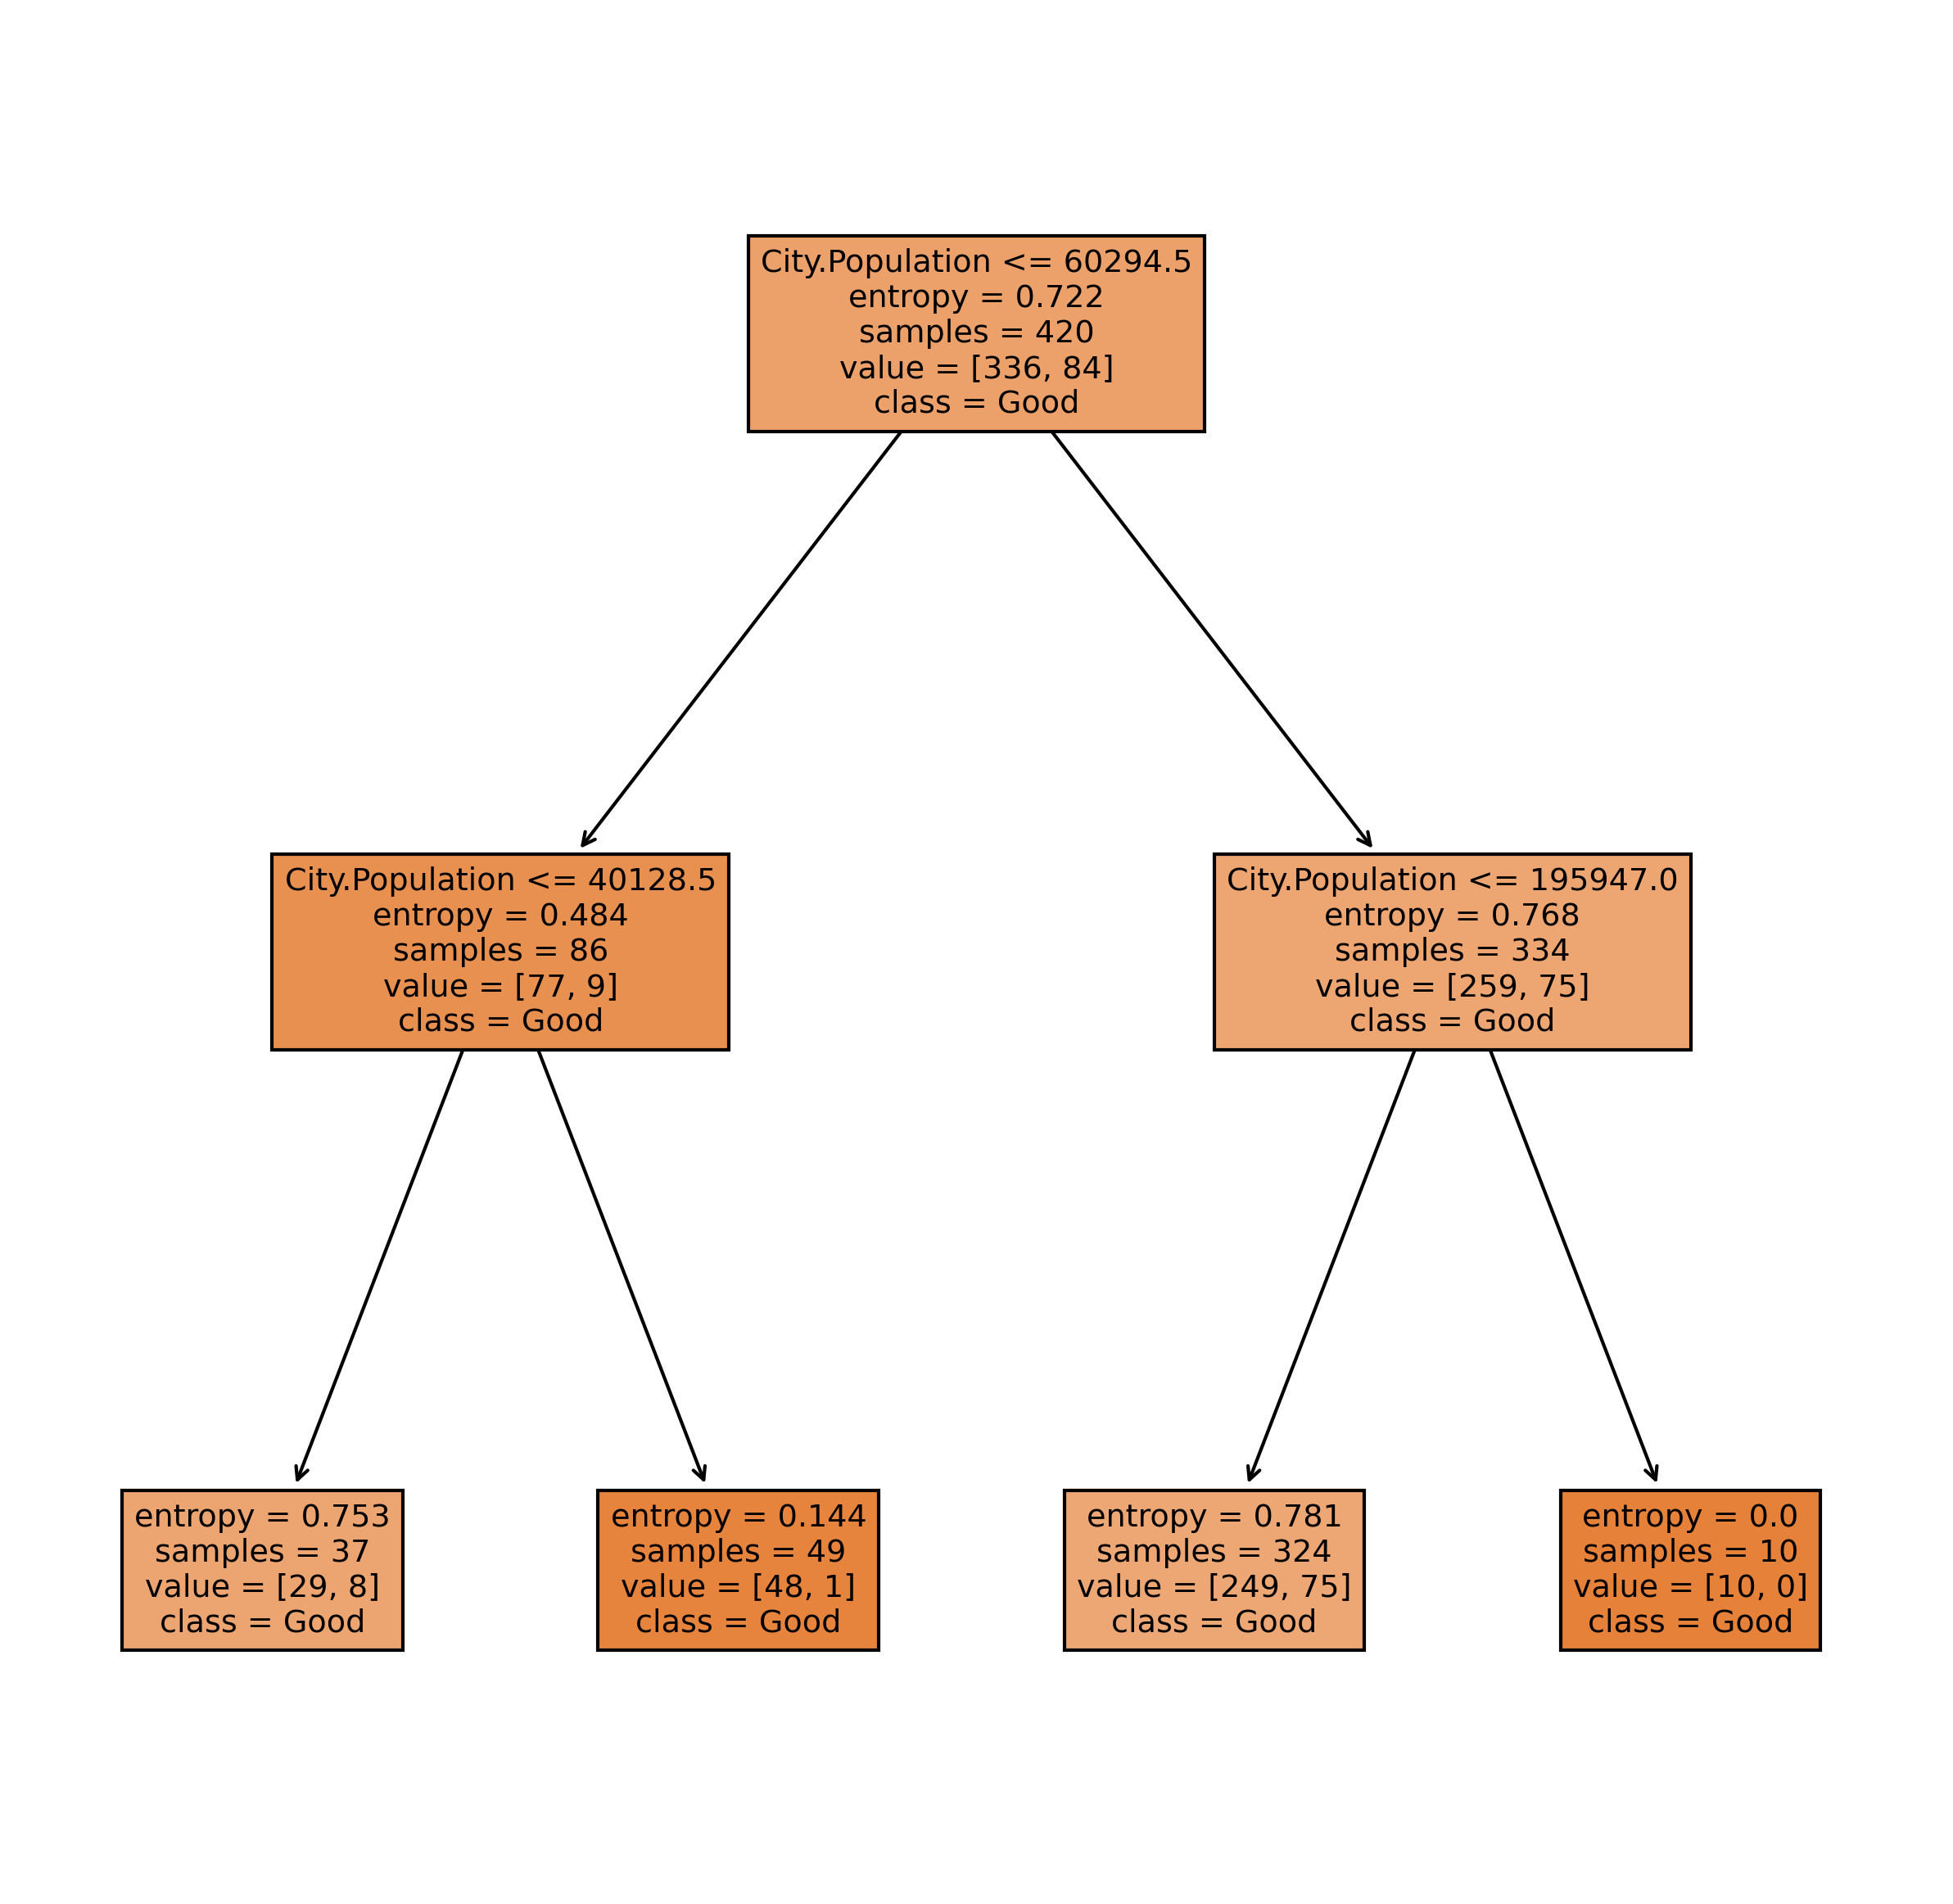

In [28]:
fn = ['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban']
cn = ['Good','Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [29]:
# predicting 
pred = model.predict(x_test)
pd.Series(pred).value_counts()

Good    180
dtype: int64

In [30]:
pred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [31]:
pd.crosstab(y_test,pred)

col_0,Good
tax_value,
Good,140
Risky,40


In [32]:
np.mean(pred==y_test)

0.7777777777777778

In [33]:
# accuracy is 77%

In [38]:
# Model 2

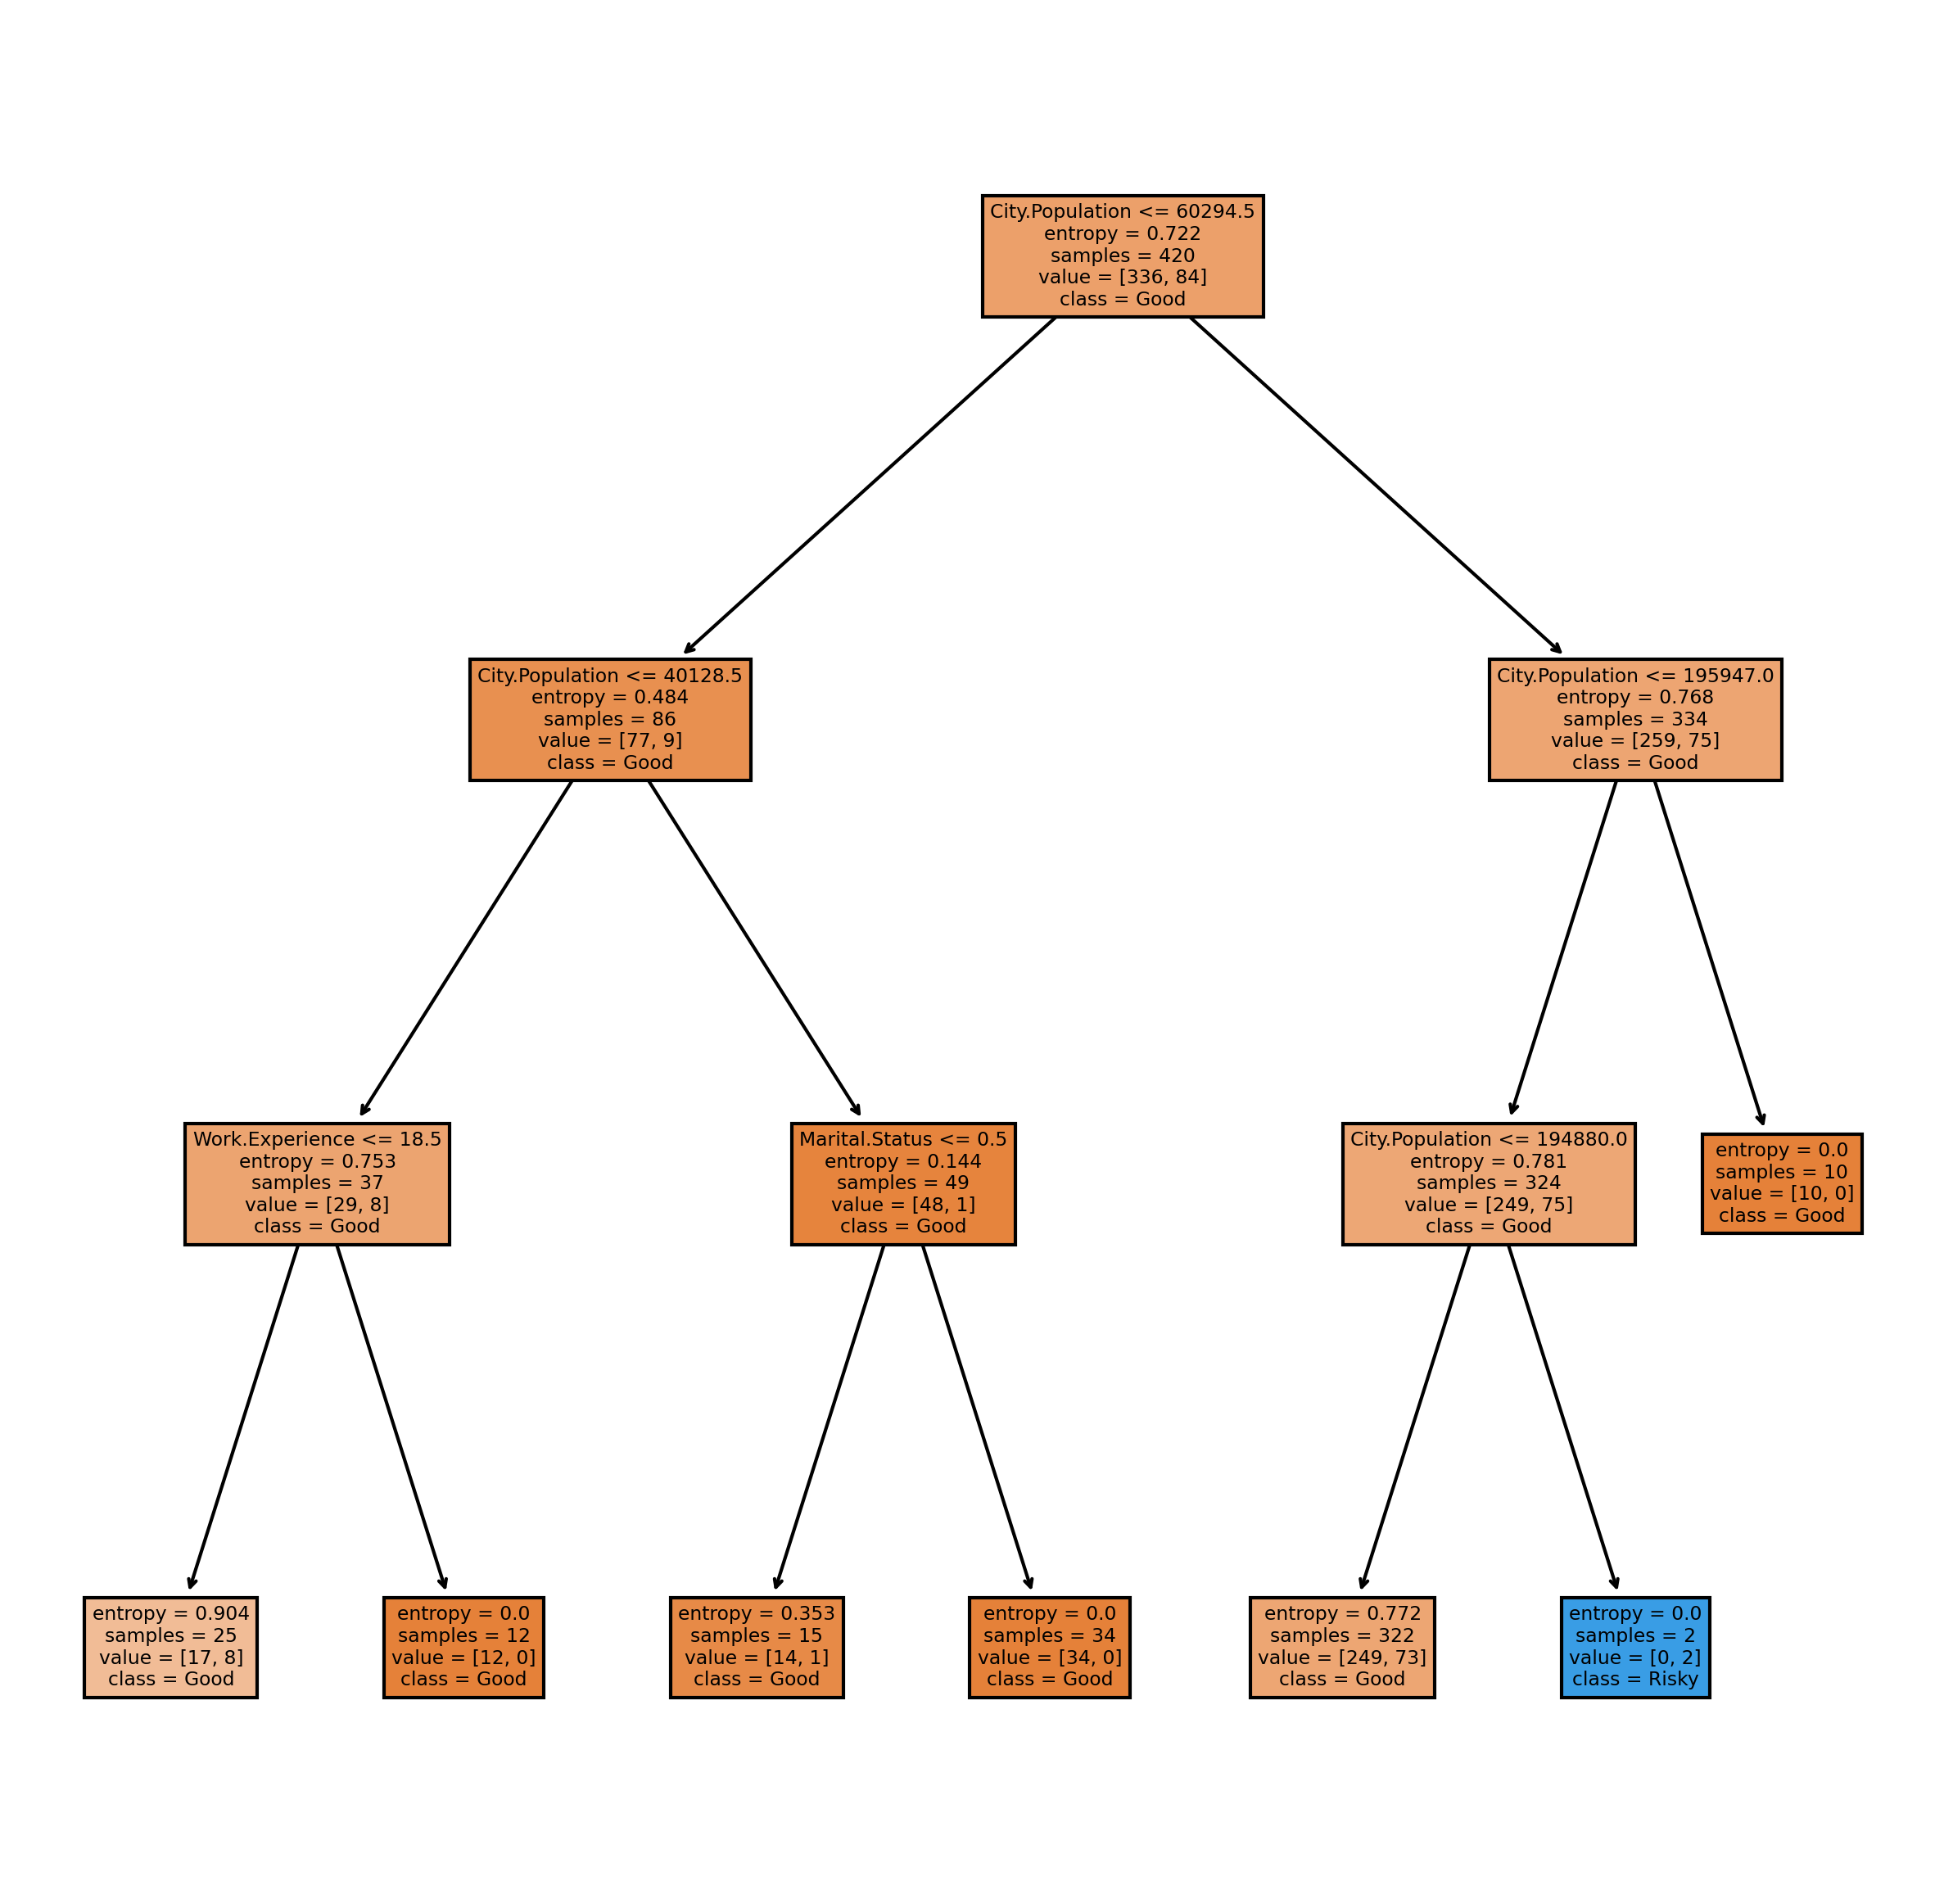

In [34]:
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model2.fit(x_train, y_train)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(model2,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [35]:
pred2 = model2.predict(x_test)
pd.Series(pred2).value_counts()

Good     179
Risky      1
dtype: int64

In [36]:
np.mean(pred2==y_test)

0.7722222222222223

In [37]:
# by increasing the tree depth accuracy is almost same 